# Project: Investigate a Dataset - noshowappointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> this a data set of medical appointments in Brazil, our main goal is exploring this dataset to know why patients didn't show up in their appointments, the data set contains the following columns:
> <ul>
> <li>PatientId : unique identifier for the patient</li>
> <li>AppointmentID : unique identifier for the appointment</li>
> <li>Gender : Gender of the patient</li>
> <li>ScheduledDay: the day secheduled for appointment</li>
> <li>AppointmentDay: the actual day the patient shown up in it</li>
> <li>Age : Age of the patient</li>
> <li>Neighbourhood : the place of the appointment</li>
> <li>Scholarship : is the patient registered in a wellfair program or not</li>
> <li>Hipertension : is the patient has Hipertension</li>
> <li>Diabetes : is the patient has Diabetes</li>
> <li>Alcoholism : is the patient has Alcoholism</li>
> <li>Handcap : is the patient Handcap</li>
> <li>SMS_received : is the paient receive sms for the appointment</li>
> <li>No-show : is the patient show up in his appointment (no for show up - yes for not show)</li>
> </ul>  


### Question(s) for Analysis
The main goal of this analysis is to answer the question why patients didn't show up in their appointments, what is the factors that prevent them form showing up in order to be able to predict their behaviuor in the future depeing on these features

In [267]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [268]:
# Load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [269]:
# having a look at sample the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [270]:
# chek datatypes and missing values
df.info()
# Dataset does not have missing values
# ScheduledDay, AppointmentDay is of type object and should be datetime
# No-show is of type object we can convert to bool
# PatientId is float and it's better to be integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [271]:
df.describe()
# Age containg negative values which is wrong 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [272]:
#check the number of nagative values of the ages
negative_age = df['Age'] < 0
sum(negative_age)
# Age have one wrong value < 0, because Age in years we use the condition <0 not <= 0 , patient may be child in months

1

In [273]:
#check for duplicated rows
sum(df.duplicated())
# there is no duplicated rows in the dataset

0

In [274]:
# check for duplicated AppointmentID, it should be unique
sum(df['AppointmentID'].duplicated())
# there is no duplicated AppointmentID

0


### Data Cleaning
 

In [275]:
# Drop the negative value of Age, It's one value and will not affect data exploration
df.drop(df[negative_age].index,inplace= True)

In [276]:
# Convert object columns to the valid type

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['PatientId'] = df['PatientId'].apply(np.int64)

In [277]:
# check that we have the datatypes as we need
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

in this section we will try to answer our main question why people didn't show up, what is the features that have imapct on the patients that didn't show up

In [278]:
#filter patient that didn't shown in their appointment
not_shown = df[df['No-show'] == 'Yes']

#calc total number of Patient that didn't shown
total_number_not_shown = not_shown['No-show'].count()

#filter patient that shown in their appointment
shown = df[df['No-show'] == 'No']

#calc total number of Patient that shown
total_number_shown = shown['No-show'].count()

#Percent of Patient that shown up
shown_percent = total_number_shown / df.shape[0] * 100

#Percent of Patient that didn't shown up
not_shown_percent = total_number_not_shown / df.shape[0] * 100

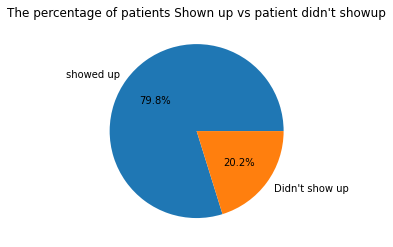

In [279]:
fig, ax = plt.subplots()
plt.pie([shown_percent,not_shown_percent], labels=["showed up", "Didn't show up"],autopct='%1.1f%%')
plt.title("The percentage of patients Shown up vs patient didn't showup")
fig.set_facecolor('white');

In [280]:
print(f"total number shown : {total_number_shown}")
print(f"total number not shown : {total_number_not_shown}" )

total number shown : 88207
total number not shown : 22319


we have 22319 of patient that didn't shown up in their appointments which reresents 20.2% of the total number of patients

In [281]:
def draw_bar_graph(data,title,xlabel,ylabel,tick_label = None,locator = None,figsize = (10,7),rotation=0):
   
   '''
   Plot bar graph

            Parameters:
                    data: data to be plotted
                    title: title of the figure 
                    xlabel: x-axis lebel
                    ylabel: y-axis lebel
                    tick_label: list of x-axis tick lebels
                    locator: tuple contains axis and nbins number of bins on the axis
                    figsize: tuple contains the width and heigh of figure to be plotted
                    rotation: rotate the tick labels on the x-axis
   '''

   fig, ax = plt.subplots(figsize=figsize)
   ax.grid(True, linestyle='-')
   ax.tick_params(axis='x', which='major', labelsize=10)
   plt.xticks(rotation=rotation)

   if locator != None:
      axis, nbins = locator
      plt.locator_params(axis= axis,nbins= nbins)

   plt.bar(data.index,data,tick_label=tick_label,width=0.5,align='center')
   plt.title(title)
   plt.xlabel(xlabel,labelpad=20)
   plt.ylabel(ylabel);

In [282]:
def draw_stacked_bar_graph(data,y,legend_label = None, legend_Title=None):
   
   '''
   Plot stacked bar graph

            Parameters:
                    data: data to be plotted
                    y: the values on y axis 
                    legend_label: lebel of the legend
                    legend_Title: list of legend titles
   '''
   fig, ax = plt.subplots() 
   
   data.unstack().plot(kind='bar',y=y,stacked=True,ax=ax)
   
   ax.set_ylabel("Number of Patients")
   
   if legend_label != None and legend_Title !=None:
      plt.legend(legend_label,title=legend_Title);

### Is the scholarship of the paitent have influence on attend the appointment

In [283]:
# get the percent of patient that have scholarship and didn't show vs the percent of pateint that not have scholarship and didn't show
result = (not_shown.groupby(['Scholarship']).count()['No-show'] / total_number_not_shown) * 100

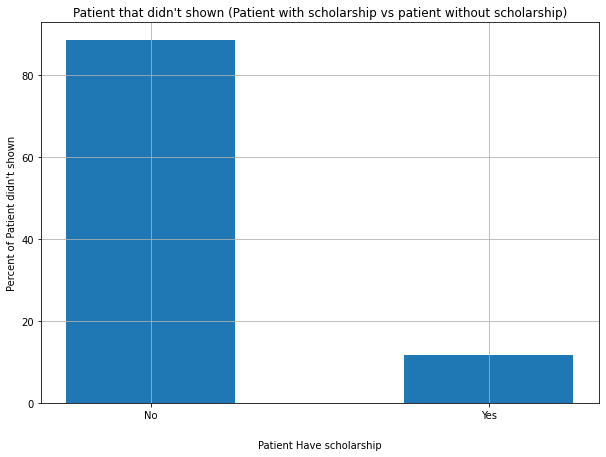

In [284]:
# plotting the result of grouping the patient that didn't show by scholarship
draw_bar_graph(result,"Patient that didn't shown (Patient with scholarship vs patient without scholarship)",'Patient Have scholarship',"Percent of Patient didn't shown",["No", "Yes"])


this is result shows that over 80% of patient that didn't show up didn't receive sms so this is a key factor in our analysis

In [285]:
#Compare shown and not shown patient grouped by the scholarship
result = df.groupby(['No-show','Scholarship']).count()

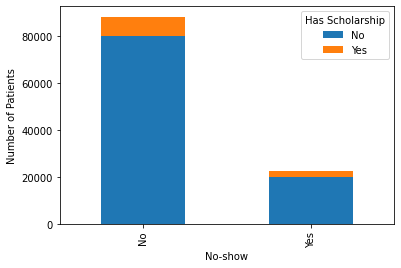

In [286]:
draw_stacked_bar_graph(result,'AppointmentID',['No', 'Yes'],'Has Scholarship')

we noticed that not shown patient is about 20,000 most of them does not have scholarship but overall most of patient does not have scholarship

### Is the age has an impact on not showing

In [287]:
#Group not shown up patient by age
result = (not_shown.groupby(['Age']).count()['No-show'] / total_number_not_shown) * 100

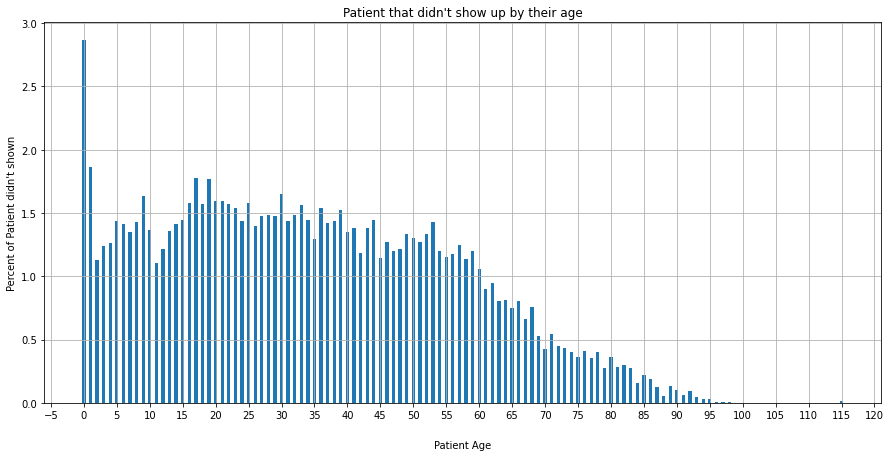

In [288]:
draw_bar_graph(result,"Patient that didn't show up by their age",'Patient Age',"Percent of Patient didn't shown",locator=('x',30),figsize=(15,7))

we notice that most of ages that not show up is patient less than a year, but the pecent is just over 2.5 % of the total patient that didn't showup, so the age don't have a great effect of not showing up

### Is the Neighbourhood affect on showingup

In [289]:
result = (not_shown.groupby(['Neighbourhood']).count()['No-show'] / total_number_not_shown) * 100

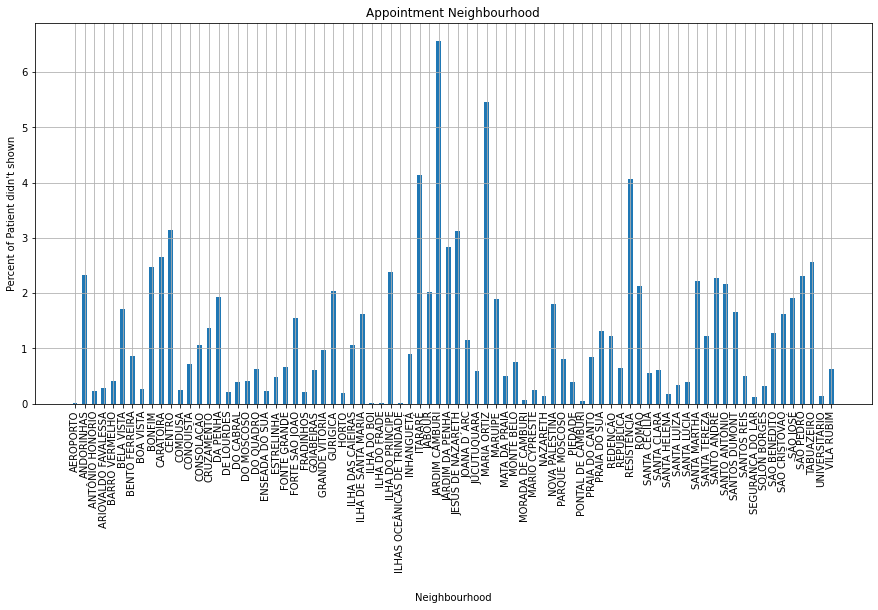

In [290]:
draw_bar_graph(result,"Appointment Neighbourhood",'Neighbourhood',"Percent of Patient didn't shown",figsize=(15,7),rotation=90)

we find out that the top 4 places that patient didn't show up in is : JARDIM CAMBURI,MARIA ORTIZ,ITARARE and RESISTENCIA,  but here we talk about 6% heightes percent of the total patient that did not show up 

### is receiving SMS affect on showingup

In [291]:
result = (not_shown.groupby(['SMS_received']).count()['No-show'] / total_number_not_shown) * 100

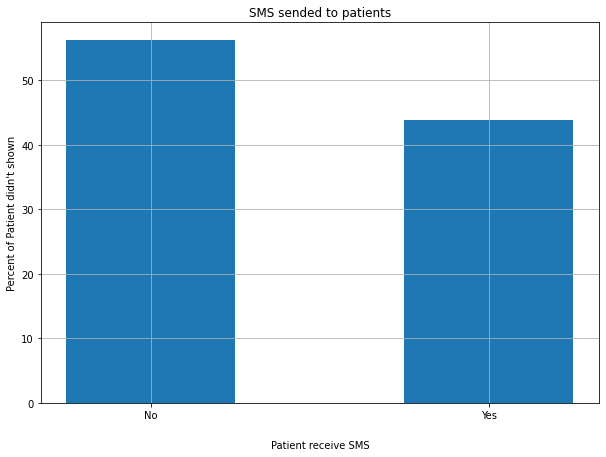

In [292]:
draw_bar_graph(result,"SMS sended to patients",'Patient receive SMS',"Percent of Patient didn't shown",tick_label=["No", "Yes"])

we notice that over 50% of patient that didn't show up didn't receive sms while about 40% receive sms

In [293]:
#Compare shown and not shown patient grouped by the SMS_received
result = df.groupby(['No-show','SMS_received']).count()

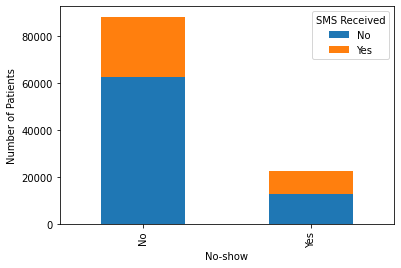

In [294]:
draw_stacked_bar_graph(result,'AppointmentID',['No', 'Yes'],'SMS Received')

graphs show that the number of patient that didn't show up and receive sms is near to the number of patient that didn't receive sms and not show up which means receving sms don't have big influence on not showing up

### is Males showingup more than Females

In [295]:
result = (not_shown.groupby(['Gender']).count()['No-show'] / total_number_not_shown) * 100

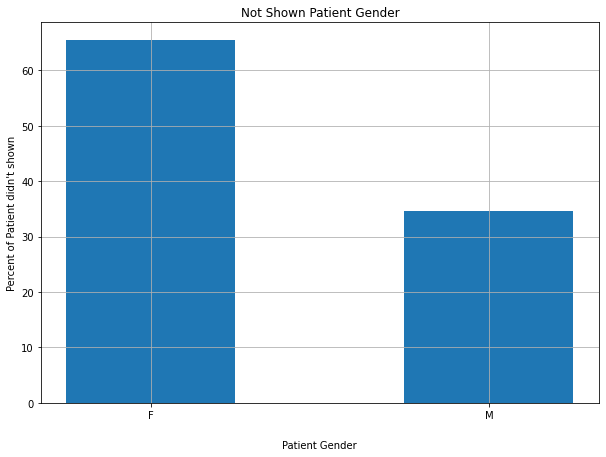

In [296]:
draw_bar_graph(result,"Not Shown Patient Gender",'Patient Gender',"Percent of Patient didn't shown")

In [297]:
#Compare shown and not shown patient grouped by the Gender
result = df.groupby(['No-show','Gender']).count()

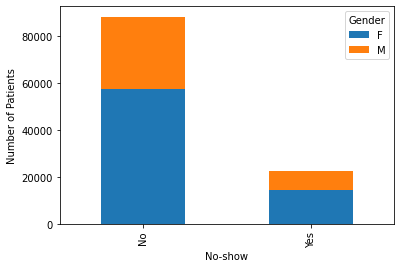

In [298]:
draw_stacked_bar_graph(result,'AppointmentID')

graphs show that most of patient that didn't show up from females over 60%

### Grouping the not showingup by the Gender,scholarship and sms received and thier effect

as we noticed that gender,scholarship and sms is the three factors that have more impact on our analysis, so we will try to group these factors together and study their impact

In [299]:
result = (not_shown.groupby(['Gender','Scholarship','SMS_received']).count()['No-show'] / total_number_not_shown) * 100

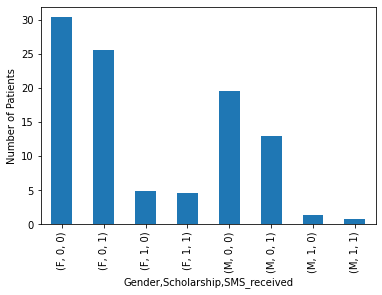

In [300]:
fig, ax = plt.subplots() 
result.plot(kind='bar',ax=ax)
ax.set_ylabel('Number of Patients');

In [301]:
#compare between shown and not shown patient grouped by Gender,Scholarship and SMS_received
result = ((df.groupby(['Gender','Scholarship','SMS_received','No-show']).count())/df.count())

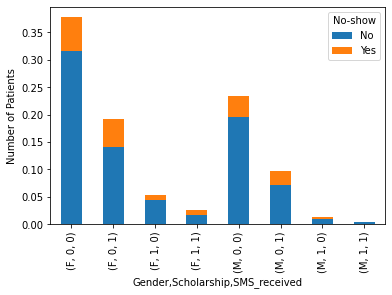

In [302]:
draw_stacked_bar_graph(result,'AppointmentID')

the graphs show that most of the patient that didn't show up from females, didn't have scholarship and didn't receive sms about 32% of the pateint that didn't show up, next females that didn't have scholarship and receive sms about 26%, then males wihout scholarship and didn't receive sms about 18% and finally males with no scholarship and receive sms about 13%

<a id='conclusions'></a>
## Conclusions

From the previous exploration and the result that we have got we can notice that:
<ul>
<li>
the key factors that impact on the show up of the patient in the features that we have analized is the scholarship and gender as most of the patient that didn't show up from females that don't have scholarship then males that don't have scholarship
</li>
<li>
we can go farther by analysing the rest of features such as the type of disease, appointment day and shecdule day
</li>

<li>
we can extract the time of the sechedule day to find if there is a relation between sechduled time and not showing up 
</li>

<li>
one of the feature that we analyse is the place of appointment if we have the distance from the appointemnt place to the patient residence we may find a relation between the distance and not showing up
</li>

<li>
total not shown patient is 22319, which is a small number to analyize it's better to get more data to have better understanding of the data and behaviour of patients
</li>

<li>Grouping the data by Neighbourhood have some comlixty because the number of places, we can mimimize the number to be plotted to get better view by selecting top 10 places that have most impact on the result</li>

<li>If we have Neighbourhood Latitude,Longtitude or regions we can group those places by region</li>

<li>another issue is with age because we have wide range of ages, we can group patient ages by ctagrizing ages ever 5 yeas bins (the age fill into these categories 5-10-15-20 and so on)</li>

<li>in the data cleaning process we just drop 1 record wich is very tiny,it's neglictable and has no affect on the exploration</li>

<li>the dataset that we have is not large engough to get bertter understanding of the behaviour espicially becasue the small number of not shown patient which about 20% of the dataset(22319), I think a dataset of 1M record with larger percent of not shown patient will produce better result in anlysis </li>

<li>
The dataset have columns of patient diseases, we don't know if these diseases is just the medical centers treat or this the diseases related to patient in the sample, my be the disease has imapct of not shown, and may be there is types of diseases their patient didn't show more that others
</li>

<li>
Another info we don't know about the appointment, if this appointment or follow up appointment, may be patient shown in the appointment but didn't shown up in the followup appointment, or may be this checkup appointment or lab appointment, all these information is missing and it may be useful 
</li>
</ul>